# How Err on F impacts Deviation and Accuracy (Many Sets)

In [28]:
from BHDVCS_tf import DvcsData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

df = pd.read_csv("/home/mag4ka/Aaryan/Rivanna/BKM10_pseudodata_generation.csv")
data = DvcsData(df)

#Get real CFF values for Kinematic Sets Chosen
def getRealValues(sets, numPhi = 45):
    realValues = []
    for s in sets: 
        ReH, ReE, ReHtilde = df.loc[numPhi * s, 'gReH': 'gReHTilde']
        realValues.append([ReH, ReE, ReHtilde])

    return realValues

#Calculates mean and std of distribution from model
def calcMeanAndStd(data):
    return [[round(np.mean(data.ReH), 4), round(np.mean(data.ReE), 4), round(np.mean(data.ReHtilde), 4)], [round(np.std(data.ReH), 4), round(np.std(data.ReE), 4), round(np.std(data.ReHtilde), 4)]]

#Plots histogram with distribution and real values for a certain kinematic set
def plotHis(data, realValues, setNum, buckets = [10, 10, 10], sameAxes = True):
    plt.hist(data.ReHtilde, bins = buckets[2])
    plt.hist(data.ReE, bins = buckets[1])
    plt.hist(data.ReH, bins = buckets[0])

    plt.title(str(setNum) + " Distribution")
    plt.legend(["ReHtilde", "ReE", "ReH"])

    if sameAxes: 
        plt.xlim(xmin=-70, xmax = 20)    
    
    plt.axvline(x=realValues[0], ymin=0, ymax=500, color = '#1a601b')
    plt.axvline(x=realValues[1], ymin=0, ymax=500, color = '#7f3f07')
    plt.axvline(x=realValues[2], ymin=0, ymax=500, color = '#0c3049')

#Sets of data that I have
sets = list(range(0, 4))
#Getting the real values (from dataset) for those values
realValues = getRealValues(sets, numPhi=45)

def getData(errValues, setNum):
    ReHSTD = []
    ReESTD = []
    ReHtildeSTD = []

    ReHMean = []
    ReEMean = []
    ReHtildeMean = []

    for err in errValues: 
        #Getting data from the file
        data = pd.read_csv("/home/mag4ka/Aaryan/Rivanna/Multi_err/Many_Predictions/Method2-"+ str(setNum) + "-" + str(err) +  ".csv")
        #Adding the std of each column into an array
        ReHSTD.append(round(np.std(data.ReH), 4))
        ReESTD.append(round(np.std(data.ReE), 4))
        ReHtildeSTD.append(round(np.std(data.ReHtilde), 4))
        # #Adding how far away mean of CFFs are to true values
        # ReHMean.append(abs(round(realValues[idx][0] - np.mean(data.ReH), 4)))
        # ReEMean.append(abs(round(realValues[idx][1] - np.mean(data.ReE), 4)))
        # ReHtildeMean.append(abs(round(realValues[idx][2] - np.mean(data.ReHtilde), 4)))

        ReHMean.append(abs(round(np.mean(data.ReH), 4)))
        ReEMean.append(abs(round(np.mean(data.ReE), 4)))
        ReHtildeMean.append(abs(round(np.mean(data.ReHtilde), 4)))

    return ReHSTD, ReESTD, ReHtildeSTD, ReHMean, ReEMean, ReHtildeMean

def plot(errValues, setNum, wantPlots = True):
    ReHSTD, ReESTD, ReHtildeSTD, ReHMean, ReEMean, ReHtildeMean = getData(errValues, setNum)
    print("Best Fit Lines if ErrF is in Percent")
    x, b = np.polyfit(errValues, ReHMean, 1)
    print("ReH Acc Best Fit: " + str(round(x/100, 4)) + "x + " + str(round(b, 4)))
    x, b = np.polyfit(errValues, ReEMean, 1)
    print("ReE Acc Best Fit: " + str(round(x/100, 4)) + "x + " + str(round(b, 4)))
    x, b = np.polyfit(errValues, ReHtildeMean, 1)
    print("ReHtilde Acc Best Fit: " + str(round(x/100, 4)) + "x + " + str(round(b, 4)))

    if wantPlots: 
        fig, axes = plt.subplots(1, 3)
        fig.suptitle('Set ' + str(setNum + 1))
        axes[0].set_title('ReH')
        axes[0].plot(errValues, ReHMean, 'x')
        axes[0].plot(errValues, ReHSTD, 'o', color = '#1f77b4')
        

        axes[1].plot(errValues, ReEMean, 'x')
        axes[1].plot(errValues, ReESTD, 'o', color = 'orange')
        axes[1].set_title('ReE')

        axes[2].plot(errValues, ReHtildeMean, 'x')
        axes[2].plot(errValues, ReHtildeSTD, 'o', color = 'green')
        axes[2].set_title('ReHtilde')
        
        for ax in axes:
            ax.set(xlabel='errF')

        fig.set_size_inches(18.5, 4.5, forward=True)

errValues = [0.0, 0.01, 0.025, 0.05]

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: 0.2295x + 1.3912
ReE Acc Best Fit: 0.4611x + 1.2704
ReHtilde Acc Best Fit: 0.6276x + 1.6952


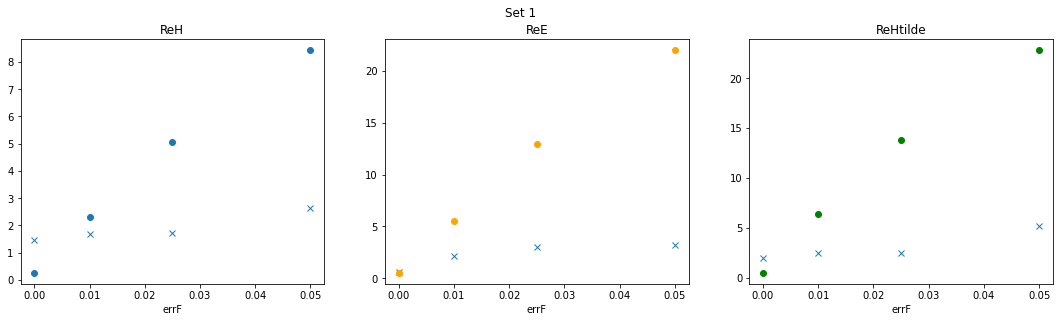

In [38]:
plot(errValues, 0)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: -0.0923x + 4.6872
ReE Acc Best Fit: 0.7442x + 42.0452
ReHtilde Acc Best Fit: -0.4006x + 14.2841


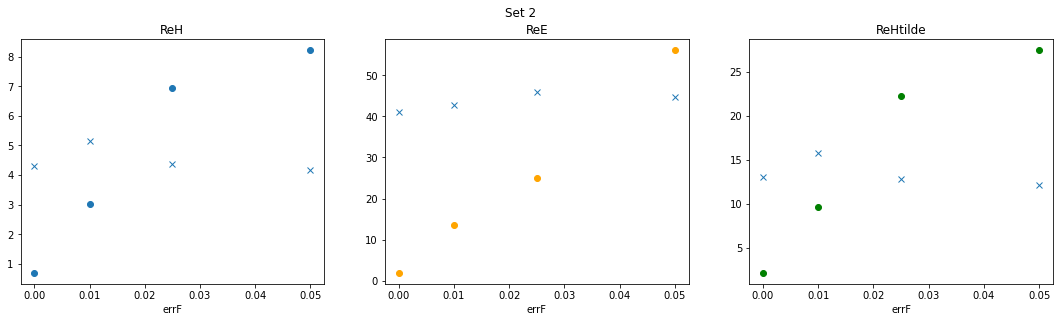

In [39]:
plot(errValues, 1)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: 0.0381x + 0.7893
ReE Acc Best Fit: 1.5433x + 41.546
ReHtilde Acc Best Fit: -0.2819x + 3.4392


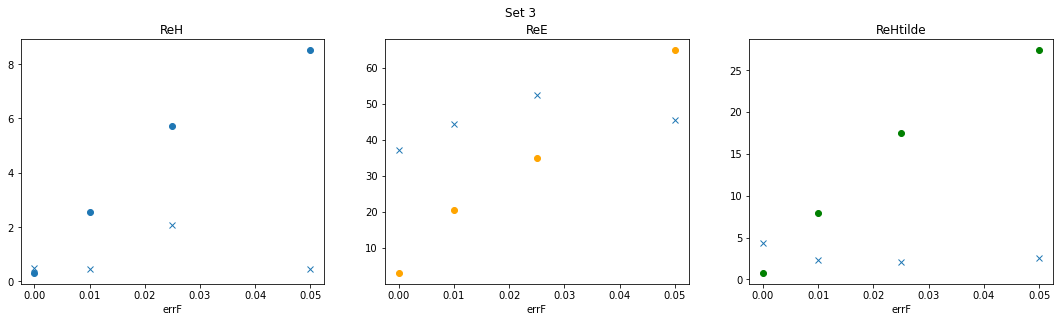

In [40]:
plot(errValues, 2)

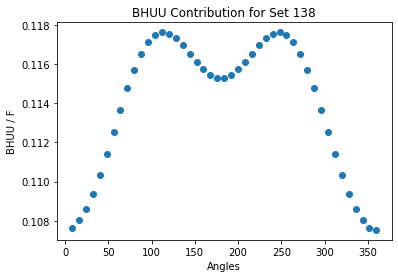

In [8]:
getContribution(137)

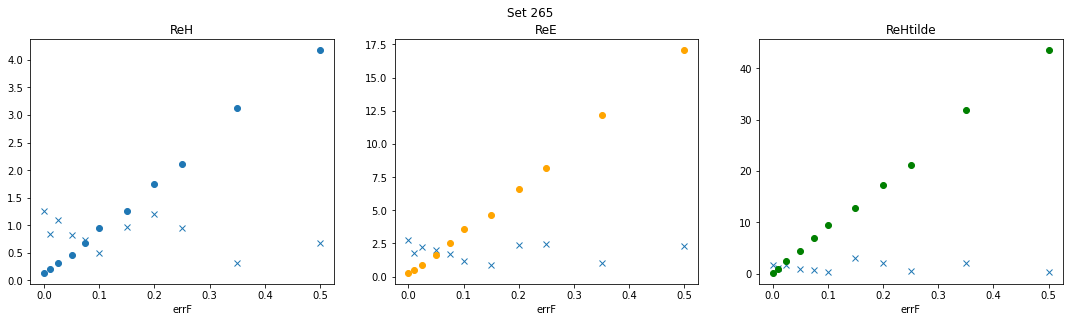

In [57]:
plot(errValues, 264)

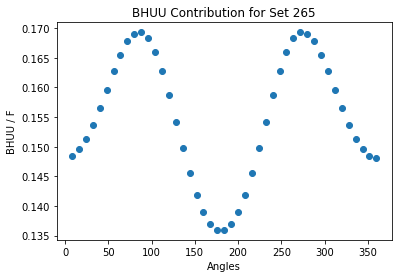

In [7]:
getContribution(264)

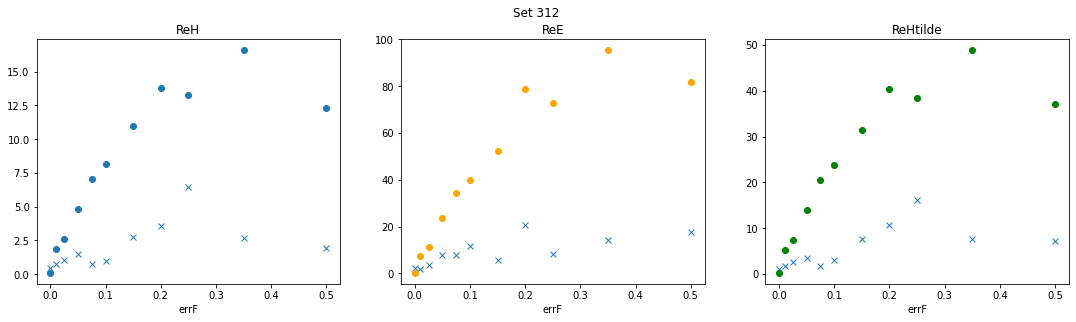

In [58]:
plot(errValues, 311)

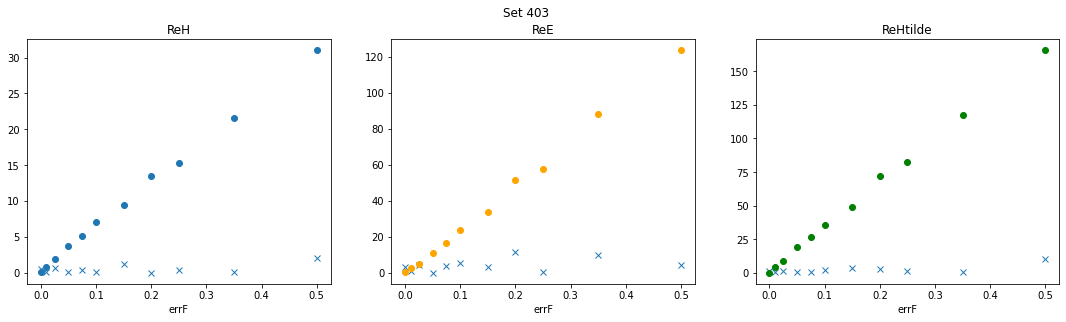

In [59]:
plot(errValues, 402)

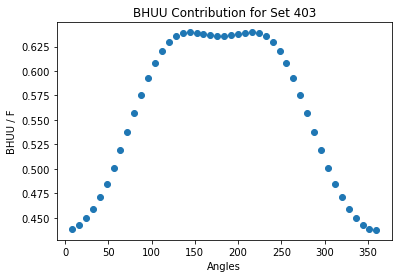

In [6]:
getContribution(402)

Seeing whether results for set 312 and 99 are consistent

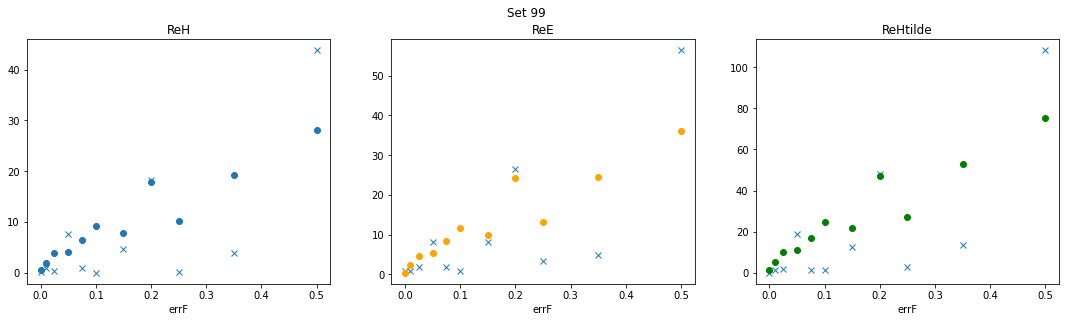

In [4]:
plot(errValues, 98)

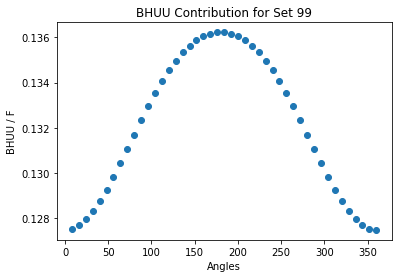

In [5]:
getContribution(98)

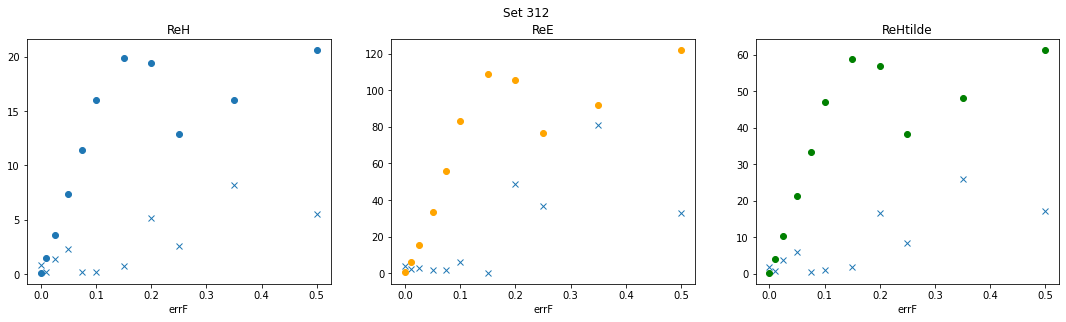

In [5]:
plot(errValues, 311)

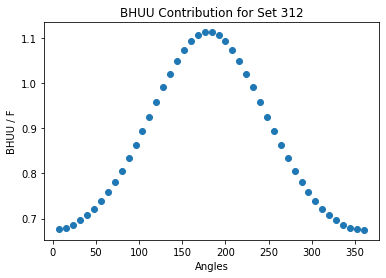

In [4]:
getContribution(311)

# BH compared to F

In [36]:
from BHDVCS_tf2 import BHDVCStf_Aaryan
bhdcs = BHDVCStf_Aaryan()

def getContribution(s, angles = 45):
    set = data.getSet(s)
    BH = bhdcs.curve_fit_array(set.XnoCFF).numpy().flatten()
    F = set.y

    contribution = np.divide(BH, F) 
    x = [*range(int(360/angles), 360+1, int(360/angles))]
    print(len(x))
    print(len(contribution))
    plt.scatter(x, contribution)
    plt.xlabel("Angles")
    plt.ylabel("BHUU / F")
    plt.title("BHUU Contribution for Set " + str(s + 1))

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: -0.0066x + 0.8259
ReE Acc Best Fit: -0.0515x + 3.2162
ReHtilde Acc Best Fit: 0.0582x + 1.2114


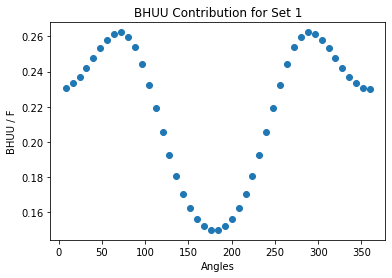

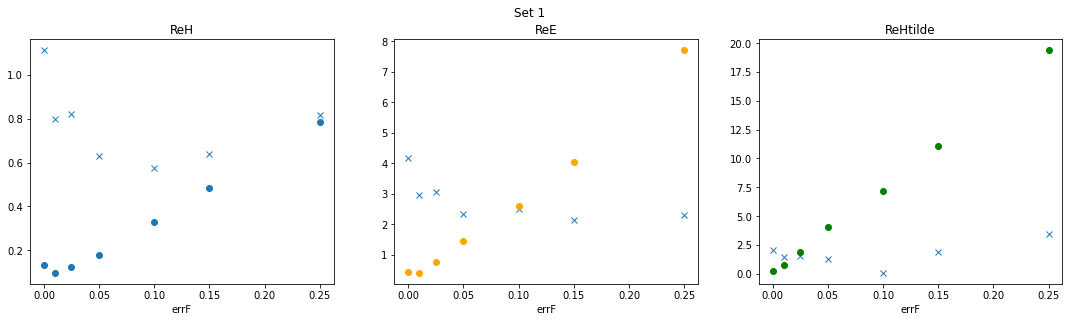

In [18]:
getContribution(0)
plot(errValues, 0)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: 0.1272x + 0.1104
ReE Acc Best Fit: 0.1855x + 1.1787
ReHtilde Acc Best Fit: 0.4634x + 0.1094


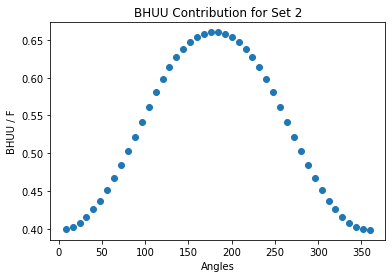

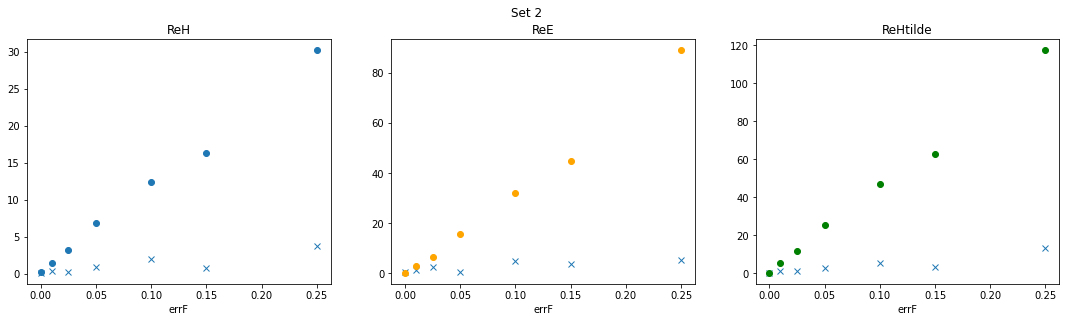

In [19]:
getContribution(1)
plot(errValues, 1)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: 0.012x + 0.4515
ReE Acc Best Fit: 0.0871x + 0.9313
ReHtilde Acc Best Fit: -0.0334x + 1.3324


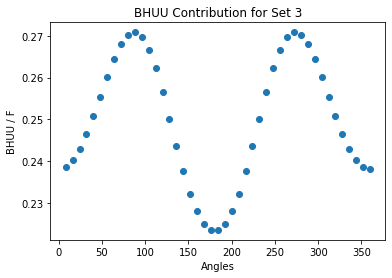

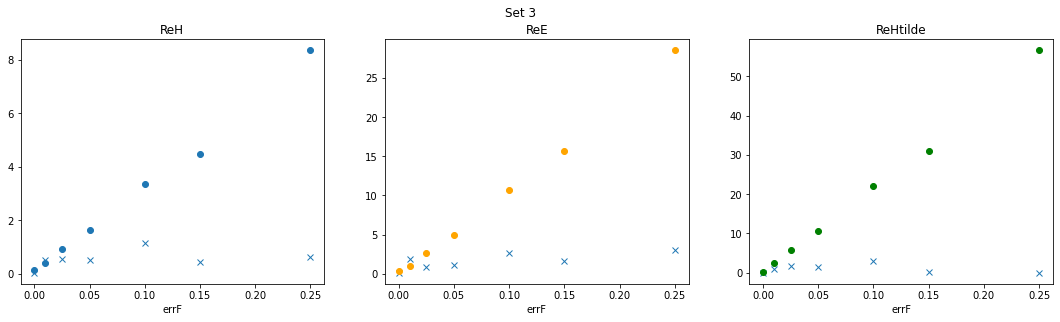

In [20]:
getContribution(2)
plot(errValues, 2)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: -0.002x + 1.6026
ReE Acc Best Fit: 0.0668x + 11.9102
ReHtilde Acc Best Fit: 0.0001x + 2.3054


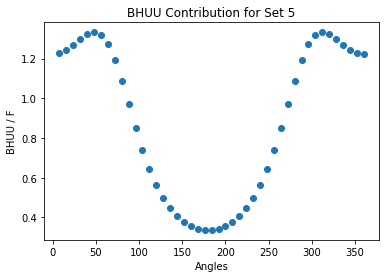

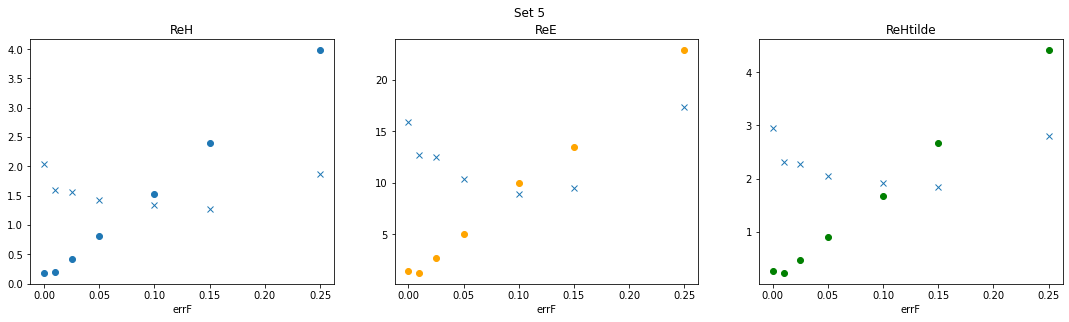

In [21]:
getContribution(4)
plot(errValues, 4)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: 0.4329x + 3.2944
ReE Acc Best Fit: 0.4597x + 4.5595
ReHtilde Acc Best Fit: 1.032x + 8.5773


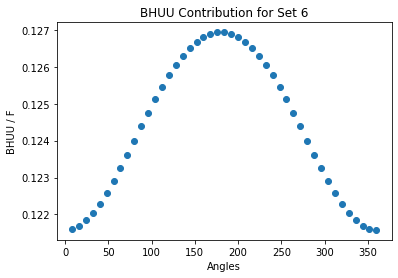

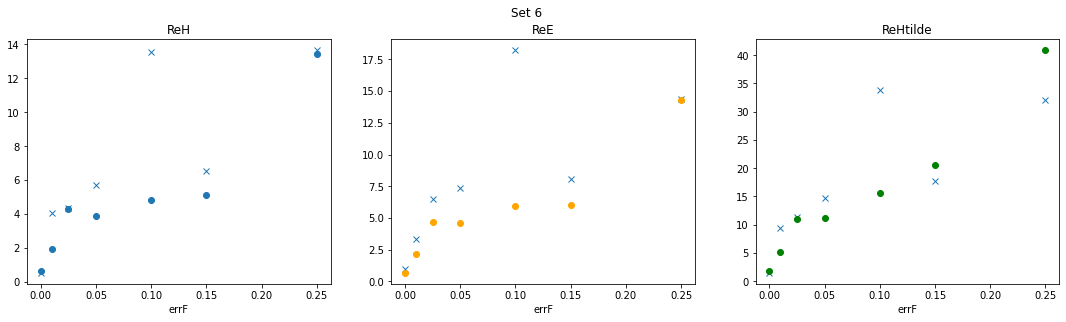

In [11]:
getContribution(5)
plot(errValues, 5, True)

# Doing This on a Bigger Scale

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: 0.1834x + 0.1507
ReE Acc Best Fit: 0.2749x + 4.0825
ReHtilde Acc Best Fit: 0.5692x + 0.3177


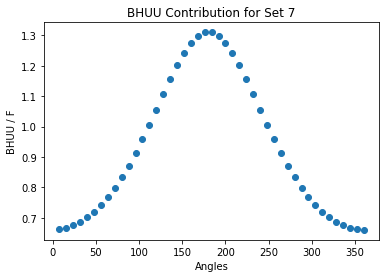

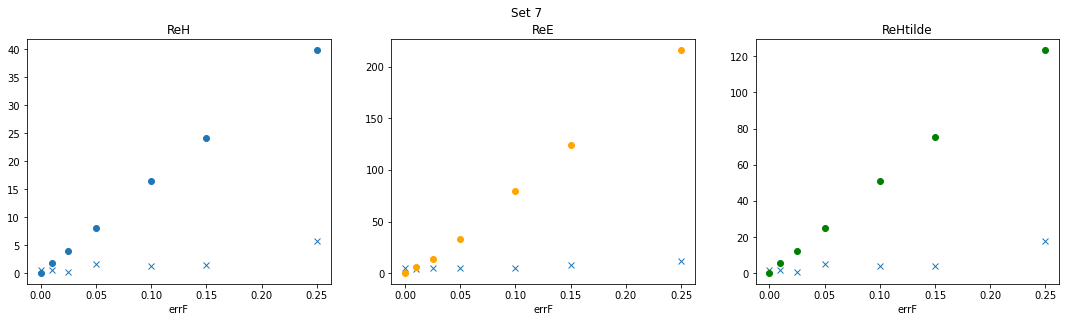

In [23]:
getContribution(6)
plot(errValues, 6, True)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: 0.0688x + 0.3374
ReE Acc Best Fit: 0.0136x + 0.7381
ReHtilde Acc Best Fit: 0.2282x + 0.1554


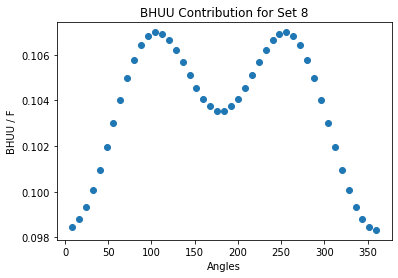

In [13]:
getContribution(7)
plot(errValues, 7, False)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: 0.1909x + 2.0459
ReE Acc Best Fit: 0.247x + 2.1351
ReHtilde Acc Best Fit: 0.4496x + 3.1407


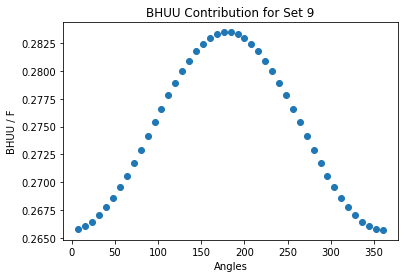

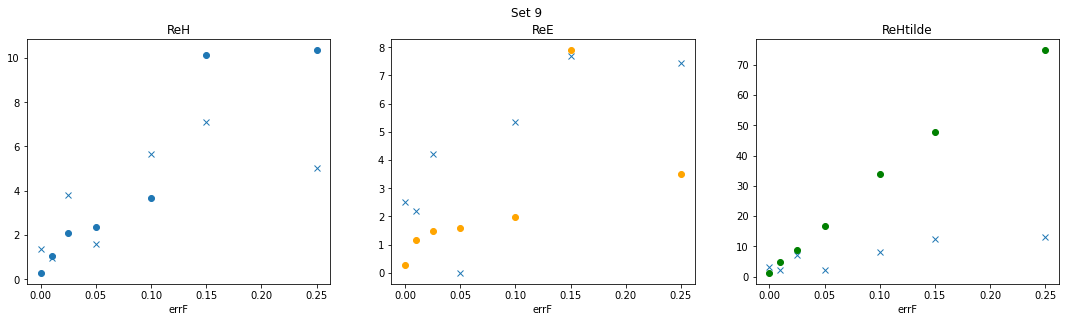

In [3]:
getContribution(8)
plot(errValues, 8, True)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: 0.0034x + 0.1595
ReE Acc Best Fit: 0.0683x + 5.2359
ReHtilde Acc Best Fit: 0.0387x + 1.8317


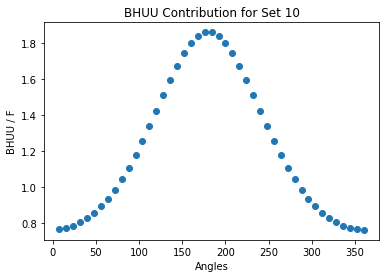

In [15]:
getContribution(9)
plot(errValues, 9, False)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: 0.0008x + 0.1919
ReE Acc Best Fit: -0.0294x + 7.4067
ReHtilde Acc Best Fit: -0.0041x + 2.0448


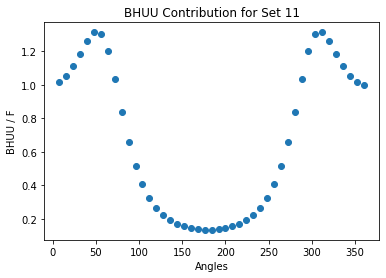

In [16]:
getContribution(10)
plot(errValues, 10, False)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: 0.0303x + 0.3606
ReE Acc Best Fit: -0.0499x + 2.1298
ReHtilde Acc Best Fit: 0.1514x + 0.6816


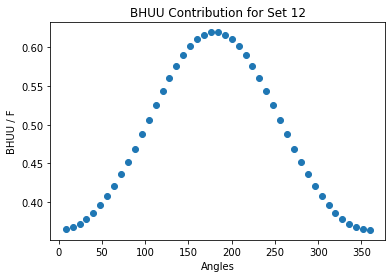

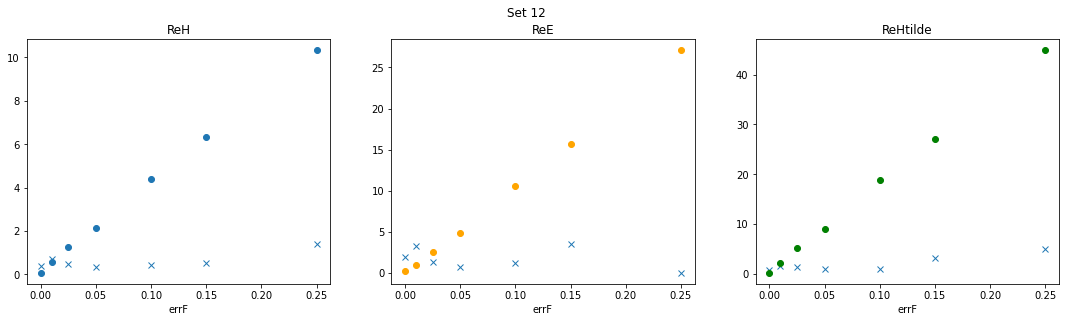

In [18]:
getContribution(11)
plot(errValues, 11, True)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: 0.0152x + 0.2018
ReE Acc Best Fit: -0.0428x + 2.1527
ReHtilde Acc Best Fit: 0.1031x + 0.4633


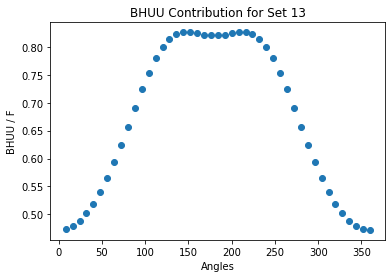

In [19]:
getContribution(12)
plot(errValues, 12, False)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: -0.0132x + 0.7176
ReE Acc Best Fit: -0.0476x + 2.1864
ReHtilde Acc Best Fit: -0.0052x + 0.9603


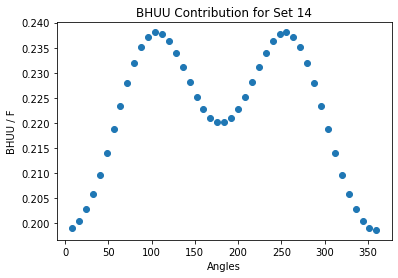

In [20]:
getContribution(13)
plot(errValues, 13, False)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: -0.0011x + 0.7227
ReE Acc Best Fit: 0.0851x + 1.9797
ReHtilde Acc Best Fit: 0.0336x + 1.8185


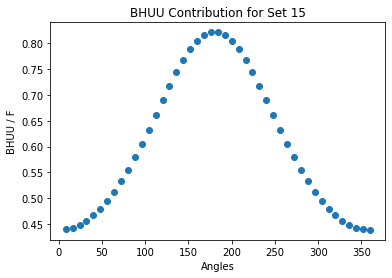

In [21]:
getContribution(14)
plot(errValues, 14, False)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: -0.0115x + 0.645
ReE Acc Best Fit: 0.0092x + 3.2065
ReHtilde Acc Best Fit: -0.0046x + 1.4321


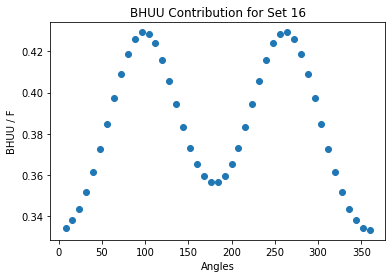

In [22]:
getContribution(15)
plot(errValues, 15, False)